
# *****************************
#  Sample Data Science Project by Sango
# *****************************


# 1- Problem Understanding - Define problem to be solved


## How would you know how much walking you could do to improve your health? 

## Are there any correlations between household income and health issues such as obesity, diabetes, asthma, and  heart disease in Los Angeles, CA ?

Literature Review:                                                                                                                                                                             

Harvard School of Public Health states that “keeping active can help people stay at a healthy weight or
lose weight"[1]. Also, physical activities such as walking can lower the risk of heart disease, diabetes, stroke, high blood pressure, and
certain cancers, as well as reduce stress and boost mood”. Furthermore, being moderate active for at least 30
minutes a day on most days of the week can help lower the risk of chronic disease.

- Project Objectives:

The objective of this project is to create a mapviewer from health data analysis that could help to determine a data-backed strategy to boost physical activities and improve health issues such as Obesity, Diabetes, Asthma, and Heart diseases in Los Angeles County. 

- Data Analysis Goals:

 ==> Explore different data attributes related to Obesity, Diabetes, Asthma, physical activities (walking), and Heart diseases in Los Angeles by zip code
 
 ==> Perform Hotspot Analysis to determine the area impacted by obesity, asthma, heart diseases in Los Angeles County
 
 ==> Run pairwise correlations to uncover potential relations of interest among attributes 
 
 ==> Perform Forest-based Classification and Regression that show how the percentage of physical activities ( walking 150 minutes weekly)impact Obesity, Asthma, and diabetes in LA County. 
 
 
This notebook deals with few of the steps of the CRISP-DM data science methodology including date understanding, Modeling, evaluation, and deployment. 


Additional analysis like Forest-based Classification and Regression and Hotspot analysis will be done in Arcgis Pro to facilitate deployment or to make the creation and sharing of mapviewer easier.


Finally, to successfully complete the project, we are planning to use several tools such as Excel, ArcGIS Online Notebook, and ArcGIS Pro. These tools will help to perform initial data exploration, data processing, modeling, and other tasks. Besides, we will use techniques such as clustering, forest-based classification and regression when necessary. 


In [3]:
from arcgis.gis import GIS
gis = GIS("home")
print("Successfully logged in as: " + gis.properties.user.username)

Successfully logged in as: sango.fon


In [2]:
from skimage import io
img = io.imread('/arcgis/home/dataScience/CRISP DM.JPG')

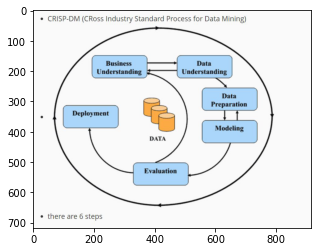

In [3]:
import matplotlib.pyplot as plt
plt. imshow(img)

# Data Understanding :

Data Collection and Description 

  For this project, we are using data published by Los Angeles Department of Transportation. Data is about adult respondents ages 18+ who were ever diagnosed with heart disease, obesity, asthma, diabetes and their respective percent of physical activity (walking 150 minutes each week). Data is taken from the California Health Interview Survey Neighborhood Edition  (http://askchisne.ucla.edu/). Furthermore, repondents with obesity are those with body Max Index (BMI) of 30.0 and above. Years covered are from 2013-2014 by zip code. 
     
Data Sources:                                                                                                  
https://www.laalmanac.com/employment/em12c_2015.php     

https://geohub.lacity.org/datasets/ladot::physical-activity-walking-in-adults-2013-2014/about

https://geohub.lacity.org/datasets/ladot::prevalence-of-adult-heart-disease-2013-2014/about

https://geohub.lacity.org/datasets/ladot::prevalence-of-adult-diabetes-2013-2014/about

https://geohub.lacity.org/datasets/ladot::prevalence-of-adult-obesity-2013-2014/about


Variables Definitons:

“Percent_obesity” = estimated percentage of adult respondents ages 18+ who had a body mass index (BMI) of 30.0 or above 18 and older residing in zip code 

“Percent_Diabete” = estimated percentage of adult respondents ages 18+ who were ever diagnosed with diabetes by a doctor

“Percent_Physical_Activities” = adults ages 18+ who walked for transportation or leisure for at least 150 minutes in the past week
“Percent_Asthma” = estimated percentage of adult respondents ages 18+ who were ever diagnosed with asthma by a doctor

In [2]:
#importing some libraries 
import os
import json
import shutil
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import arcgis
from arcgis.gis import GIS
from arcgis.mapping import WebMap, WebScene
from arcgis.features import FeatureLayer
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import arcpy 
from arcpy import env
from IPython.display import display
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp

In [5]:
! pip install fiona

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [1]:
#os.listdir('/arcgis/home/dataScience')
try:
    os.mkdir('/arcgis/home/dataScience')

except:
    print(f"folder exist")

In [9]:
#now let unzip the file 
zip = ZipFile('/arcgis/home/dataScience/diabetes.zip')
zip.extractall('/arcgis/home/dataScience')

In [10]:
#assign the shp file to the variable diabetes
diabetes = '/arcgis/home/dataScience/diabetes.shp'

In [11]:
#read data in that shp file using shp.reader
diabetesdb=shp.Reader(diabetes)

In [12]:
#Display the records for data exploration
diabetesdb.records()

[Record #0: [1, '90001', 9.2, 6.0, 12.4, 41800, 95563401.8857422, 48677.2785610168],
 Record #1: [2, '90002', 10.4, 6.6, 14.2, 37900, 82752224.2978516, 44972.0171108108],
 Record #2: [3, '90003', 9.3, 5.8, 12.8, 40900, 102643123.491211, 63303.481866108],
 Record #3: [4, '90004', 9.9, 6.7, 13.1, 48100, 83956967.5087891, 52471.8977237524],
 Record #4: [5, '90005', 10.1, 6.4, 13.7, 31600, 36897792.4990234, 88445.0018972521],
 Record #5: [6, '90006', 11.3, 6.3, 16.2, 38400, 53707686.5654297, 37830.4179358462],
 Record #6: [7, '90007', 7.3, 5.1, 9.5, 31900, 68592062.2363281, 57884.2331450721],
 Record #7: [8, '90008', 12.2, 7.7, 16.6, 26700, 106644565.649414, 59093.4187828963],
 Record #8: [9, '90010', 12.1, 7.2, 17.0, 8400, 4543137.06445313, 41839.00052879],
 Record #9: [10, '90011', 6.9, 3.8, 10.1, 70500, 119579543.422852, 57120.064768486],
 Record #10: [11, '90012', 12.1, 7.9, 16.4, 16600, 98960500.2294922, 55948.3515004274],
 Record #11: [12, '90013', 7.6, 4.3, 10.8, 11800, 16870839.262

In [13]:
# We notice that diabetes data has some missing values 
#Record #123: [124, '91608', None, None, None, 0, 16240540.1796875, 17061.4089823393]

In [ ]:
#Now let show diabetes data in Los Angeles county per zip code

In [17]:
diabetes ='/arcgis/home/dataScience/diabetes.zip'

In [24]:
diabete_shp = gis.content.add({}, diabetes)
diabete_shp

<Item title:"diabetes" type:Shapefile owner:sango.fon>

In [25]:
publishedService_diabetes = diabete_shp.publish()

In [26]:
#Now let display the created feature Layer 
display(publishedService_diabetes)

<Item title:"diabetes" type:Feature Layer Collection owner:sango.fon>

<Item title:"diabetes" type:Feature Layer Collection owner:sango.fon>
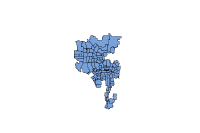

In [4]:
#Let assign diabetes feature layer to a various called diabetes_layer
# Item Added From Toolbar
# Title: diabetes | Type: Feature Service | Owner: sango.fon
diabetes_layer = gis.content.get("766fd38fa1eb441d9dc4f256d4992d79")
diabetes_layer

In [5]:
#let get Los Angeles map
LAmap = gis.map('los angeles', zoomlevel =10)
LAmap

MapView(layout=Layout(height='400px', width='100%'))

In [6]:
#Now let add diabetes feature layer to map
LAmap.add_layer(diabetes_layer)

# Data Preparation

Handling Missing Values:                      

As seen in data exploration above, the initial dataset has a couple missing values,  to avoid reducing the statistical power and cause bias in the estimation of parameters, I simply removed those values. In addition, to Geo enrich our dataset, Median Income per zipcode in Los Angeles county (2015) from the US census bureau was added. Finally, the longitude and latitude for each zip code were added to help create a spatially enabled DataFrame.

In [11]:
#Let create a dataframe  from csv dataset and call it health

In [9]:
 health = pd.read_csv('/arcgis/home/dataScience/Health.csv')

In [10]:
#let reading 20 records of our final dataset
health.head(20)

,ZIPCODE,Percent_Physical_Activities,Percent_Asthma,Percent_Heart_Disease,Percent_obesity,Percent_Diabete,Median Household Income,Population,Shape__Area,Shape__Length,SITE_Longitude,SITE_Latitude
0,90001,37.0,11.3,3.6,38.2,9.2,33887,41800,9.556340e+07,48677.27856,-118.24955,33.973980
1,90002,35.7,12.6,3.9,39.7,10.4,30413,37900,8.275222e+07,44972.01711,-118.245976,33.949009
2,90003,36.0,9.5,3.9,39.3,9.3,30805,40900,1.026431e+08,63303.48187,-118.273705,33.964032
3,90004,41.7,11.9,4.8,20.2,9.9,40612,48100,8.395697e+07,52471.89772,-118.310767,34.076067
4,90005,41.8,12.0,4.4,18.7,10.1,31142,31600,3.689779e+07,88445.00190,-118.311342,34.058384
5,90006,40.8,8.9,4.7,23.7,11.3,31521,38400,5.370769e+07,37830.41794,-118.292271,34.047604
6,90007,43.2,12.3,3.5,21.5,7.3,22304,31900,6.859206e+07,57884.23315,-118.282786,34.026540
7,90008,32.2,13.7,6.0,37.2,12.2,36564,26700,1.066446e+08,59093.41878,-118.345668,34.006924
8,90010,46.6,9.2,4.9,13.7,12.1,45786,8400,4.543137e+06,41839.00053,-118.312069,34.063288
9,90011,36.4,6.6,3.3,35.5,6.9,30251,70500,1.195795e+08,57120.06477,-118.258642,34.009842


In [11]:
#let get dataframe information
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIPCODE                      120 non-null    int64  
 1   Percent_Physical_Activities  120 non-null    float64
 2   Percent_Asthma               120 non-null    float64
 3   Percent_Heart_Disease        120 non-null    float64
 4   Percent_obesity              120 non-null    float64
 5   Percent_Diabete              120 non-null    float64
 6   Median Household Income      120 non-null    int64  
 7   Population                   120 non-null    int64  
 8   Shape__Area                  120 non-null    float64
 9   Shape__Length                120 non-null    float64
 10  SITE_Longitude               120 non-null    object 
 11  SITE_Latitude                120 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 11.4+ KB


In [12]:
health['SITE_Longitude']=health['SITE_Longitude'].astype(float)

In [13]:
#let confirm that  SITE_Longitude data type  is now float
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIPCODE                      120 non-null    int64  
 1   Percent_Physical_Activities  120 non-null    float64
 2   Percent_Asthma               120 non-null    float64
 3   Percent_Heart_Disease        120 non-null    float64
 4   Percent_obesity              120 non-null    float64
 5   Percent_Diabete              120 non-null    float64
 6   Median Household Income      120 non-null    int64  
 7   Population                   120 non-null    int64  
 8   Shape__Area                  120 non-null    float64
 9   Shape__Length                120 non-null    float64
 10  SITE_Longitude               120 non-null    float64
 11  SITE_Latitude                120 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 11.4 KB


In [19]:
# Let get a spatially enabled dataframe 
health_sdf = pd.DataFrame.spatial.from_xy(health,'SITE_Longitude','SITE_Latitude')
health_sdf.head(10)

,ZIPCODE,Percent_Physical_Activities,Percent_Asthma,Percent_Heart_Disease,Percent_obesity,Percent_Diabete,Median Household Income,Population,Shape__Area,Shape__Length,SITE_Longitude,SITE_Latitude,SHAPE
0,90001,37.0,11.3,3.6,38.2,9.2,33887,41800,9.556340e+07,48677.27856,-118.249550,33.973980,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
1,90002,35.7,12.6,3.9,39.7,10.4,30413,37900,8.275222e+07,44972.01711,-118.245976,33.949009,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
2,90003,36.0,9.5,3.9,39.3,9.3,30805,40900,1.026431e+08,63303.48187,-118.273705,33.964032,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
3,90004,41.7,11.9,4.8,20.2,9.9,40612,48100,8.395697e+07,52471.89772,-118.310767,34.076067,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
4,90005,41.8,12.0,4.4,18.7,10.1,31142,31600,3.689779e+07,88445.00190,-118.311342,34.058384,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
5,90006,40.8,8.9,4.7,23.7,11.3,31521,38400,5.370769e+07,37830.41794,-118.292271,34.047604,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
6,90007,43.2,12.3,3.5,21.5,7.3,22304,31900,6.859206e+07,57884.23315,-118.282786,34.026540,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
7,90008,32.2,13.7,6.0,37.2,12.2,36564,26700,1.066446e+08,59093.41878,-118.345668,34.006924,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
8,90010,46.6,9.2,4.9,13.7,12.1,45786,8400,4.543137e+06,41839.00053,-118.312069,34.063288,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
9,90011,36.4,6.6,3.3,35.5,6.9,30251,70500,1.195795e+08,57120.06477,-118.258642,34.009842,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."


In [15]:
#health_sdf.spatial.plot(LAmap)

In [16]:
# let display our enriched dataset in the Map

In [17]:
#let get Los Angeles map
LAmap2 = gis.map('los angeles', zoomlevel =10)
LAmap2

MapView(layout=Layout(height='400px', width='100%'))

In [18]:
health_sdf.spatial.plot(LAmap2)

True

In [32]:
#next step is our Modeling 

# Modeling

In [26]:
#Let's compute pairwise correlation of columns - this will only use numeric data
health_sdf.corr(method='pearson')

,ZIPCODE,Percent_Physical_Activities,Percent_Asthma,Percent_Heart_Disease,Percent_obesity,Percent_Diabete,Median Household Income,Population,Shape__Area,Shape__Length,SITE_Longitude,SITE_Latitude
ZIPCODE,1.000000,-0.530884,0.457168,0.130540,-0.075032,-0.176894,0.160750,0.073454,0.246465,0.258267,-0.547815,0.585152
Percent_Physical_Activities,-0.530884,1.000000,0.097207,-0.004064,-0.383725,-0.253554,-0.069986,-0.148531,-0.172769,-0.191021,0.304274,0.018084
Percent_Asthma,0.457168,0.097207,1.000000,0.256510,-0.325891,-0.469957,0.282245,-0.145037,0.192790,0.181398,-0.393068,0.617191
Percent_Heart_Disease,0.130540,-0.004064,0.256510,1.000000,-0.459554,-0.218672,0.717303,-0.429421,0.177918,0.178967,-0.395024,0.130802
Percent_obesity,-0.075032,-0.383725,-0.325891,-0.459554,1.000000,0.713431,-0.595883,0.415655,-0.008421,-0.017025,0.415392,-0.264550
Percent_Diabete,-0.176894,-0.253554,-0.469957,-0.218672,0.713431,1.000000,-0.522816,0.229585,-0.024688,-0.007936,0.509880,-0.345602
Median Household Income,0.160750,-0.069986,0.282245,0.717303,-0.595883,-0.522816,1.000000,-0.385793,0.203240,0.232345,-0.570510,0.129359
Population,0.073454,-0.148531,-0.145037,-0.429421,0.415655,0.229585,-0.385793,1.000000,0.204975,0.219320,0.119042,0.136117
Shape__Area,0.246465,-0.172769,0.192790,0.177918,-0.008421,-0.024688,0.203240,0.204975,1.000000,0.918647,-0.103340,0.324859
Shape__Length,0.258267,-0.191021,0.181398,0.178967,-0.017025,-0.007936,0.232345,0.219320,0.918647,1.000000,-0.090634,0.272676


In [27]:
sdf_for_corr = health_sdf[['Percent_Physical_Activities','Percent_Asthma','Percent_Heart_Disease','Percent_obesity','Percent_Diabete','Median Household Income']]

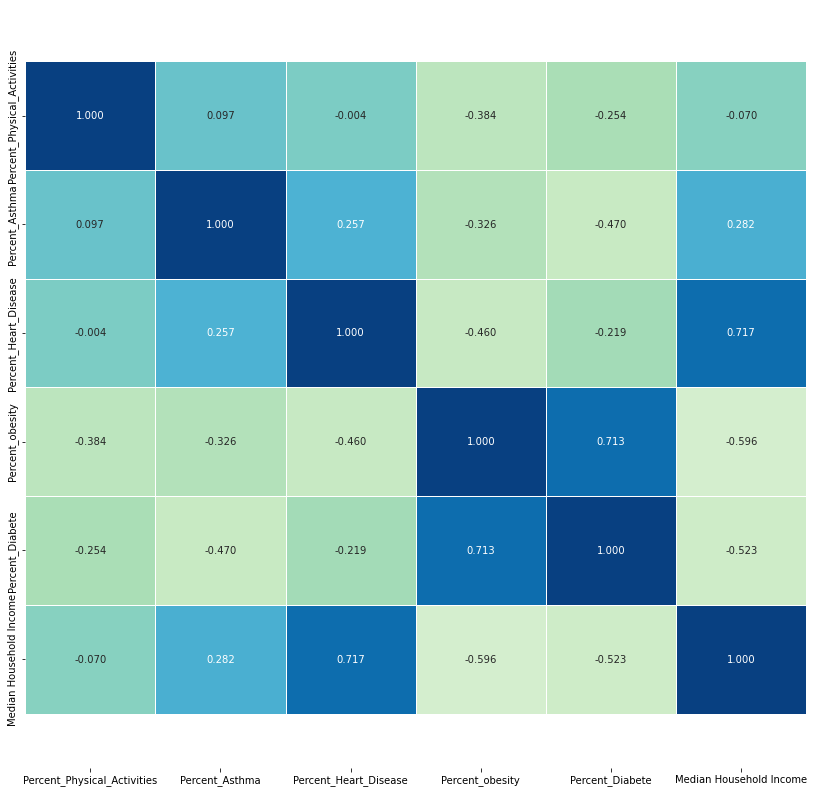

In [35]:
#let's plot the data in a graph
plt.rc('figure', figsize=(14,14))
corrMatrix = sdf_for_corr.corr()
ax = sns.heatmap(corrMatrix, annot=True, cmap="GnBu", linewidths=.5, cbar=False, center=0,fmt=".3f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

In [33]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
from scipy.stats.stats import pearsonr

In [29]:
# Pearson correlation coefficient and p-value for testing non-correlation
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 3)
    return pvalues
    
rho = sdf_for_corr.corr()
pval = calculate_pvalues(sdf_for_corr)

r1 = rho.applymap(lambda x: '{:.3f}**'.format(x))
r2 = rho.applymap(lambda x: '{:.3f}*'.format(x))
r3 = rho.applymap(lambda x: '{:.3f}'.format(x))
r4 = rho.applymap(lambda x: '{:.3f}'.format(x))

rho = rho.mask(pval>0.1,r4)
rho = rho.mask(pval<=0.1,r3)
rho = rho.mask(pval<=0.05,r2)
rho = rho.mask(pval<=0.01,r1)
rho

,Percent_Physical_Activities,Percent_Asthma,Percent_Heart_Disease,Percent_obesity,Percent_Diabete,Median Household Income
Percent_Physical_Activities,1.000**,0.097,-0.004,-0.384**,-0.254**,-0.070
Percent_Asthma,0.097,1.000**,0.257**,-0.326**,-0.470**,0.282**
Percent_Heart_Disease,-0.004,0.257**,1.000**,-0.460**,-0.219*,0.717**
Percent_obesity,-0.384**,-0.326**,-0.460**,1.000**,0.713**,-0.596**
Percent_Diabete,-0.254**,-0.470**,-0.219*,0.713**,1.000**,-0.523**
Median Household Income,-0.070,0.282**,0.717**,-0.596**,-0.523**,1.000**


In [31]:
# Refer to ArcGIS Pro for additional Analysis including Forest-based Classication and Regression and Hotspot analysis

# Evaluation 

In this phase, the goal is to review analytic output, assess insights, and propose improvements

Using the correlation results above, I did run Forest-based Classification and Regressions (Spatial Statistics Tools) 
1.  Modeling using numeric data only and independent variables based on correlations:
Variables to Predict = Percent_Physical_Activities
Explanatory Variables = Percent_Asthma;Percent_Diabete;Percent_Heart_Disease;Percent_obesity;Median Household Income

- Output Evaluation:
Top variable importance include (Median Household Income 24%, Percent_obesity 22%, and Percent_Diabete 22%)
Training Data: Regression Diagnostics R-squared 0.906 compare to Validation Data: Regression Diagnostics R-squared 0.675

- Insights Assessment ==> Based on the pearwise correlation above, we notice that Percent_obesity has a strong positive correlation with Percent_diabetes and a negative correlation with physical activities for some reasons. This should be further investigated.

Based on the strong power that Median Household Income has in explaining Percent_Physical_Activities, I used that variable as target next to see how other variables including Percent_Physical_Activities explain it. Additional outputs during the live presentation (Arcgis Pro) 

- Propose Improvement:

- Collect more data 
- Add additional variables based on Geo enrichment

- Additional evaluations could be done by going to the zip codes or neighborhood, collecting additional data through interview surveys of Adult respondents 18+ who walked for transportation or leisure at 150 minnutes in the past week in order to validate the analysis results. 

# Deployment 

 Actionable insights, recommendations, and a map (containing variables of interests) will be shared to aid in problem resolution or decision making

Shared map:

https://www.arcgis.com/apps/mapviewer/index.html?webmap=1de8b343b2124cf8b84646c033196498

Insights and Recommendations:

Based on the analysis on the mapviewer above


- In neighborhoods with low Median Household Income, we notice a high percentage of physical activities (walking) and high percentage of obesity 

- We notice a high level oh Asthma around Santa Monica Mountains area

As a recommendation, I do believe that additional data should be collected to validate these observations. Also, the insights shared on the mapviewer should be used to make decision in Los Angeles county



- Project limitation:

 ==> Time constraint: Short deadline to complete this project slightly affect the quality of analysis. with more time, meticulous  or robust analysis could be done.
 
 ==> This analysis is done on data collected in 2014. It could have been better if the data was up to date i.e. 2021 or 2022 dataset
 
 ==> Data are not collected in All Los Angeles County zip codes
 
 
- Takeaways:

This was a great learning journey and opportuny to apply most of the concepts I learned in this class in solving real-world problem. I did learn a great deal and enjoy the journey

# Reference :

[1] Physical activity. Obesity Prevention Source. (2016, April 12). Retrieved December 5, 2022,
from https://www.hsph.harvard.edu/obesity-prevention-source/obesity-causes/physical-
activity-and-
obesity/#:~:text=Physical%20activity%20increases%20people&#39;s%20total,the%20developm
ent%20of%20abdominal%20obesity

[2]  Sigal, R., Armstrong, M., &amp; Reichert, S. (n.d.). Physical Activity and Diabetes. Canadian Journal of diabetes. Retrieved December 8, 2022, from https://www.canadianjournalofdiabetes.com/ 

[3] How forest-based classification and regression works. How Forest-based Classification and Regression works-ArcGIS Pro | Documentation. (n.d.). Retrieved December 8, 2022, from https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/how-forest-works.htm 

[4] Forest-based classification and regression (spatial statistics). Forest-based Classification and Regression (Spatial Statistics)-ArcGIS Pro | Documentation. (n.d.). Retrieved December 8, 2022, from https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/forestbasedclassificationregression.htm 